<a href="https://colab.research.google.com/github/ebrukilic61/Speech-Emotion-Recognition/blob/main/speech_emotion_2_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Speech Emotion Recognition

I use CREMA-D Dataset for this study : https://www.kaggle.com/datasets/ejlok1/cremad

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

In [ ]:
image_dir = Path('/content/drive/MyDrive/input/Crema')

In [ ]:
filepaths = list(image_dir.glob(r'**/*.wav'))

In [ ]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))

In [ ]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df

,Filepath,Label
0,/content/drive/MyDrive/input/Crema/1002_IEO_AN...,ANG
1,/content/drive/MyDrive/input/Crema/1002_IEO_FE...,FEA
2,/content/drive/MyDrive/input/Crema/1002_DFA_NE...,NEU
3,/content/drive/MyDrive/input/Crema/1002_DFA_HA...,HAP
4,/content/drive/MyDrive/input/Crema/1002_IEO_FE...,FEA
...,...,...
557,/content/drive/MyDrive/input/Crema/1006_WSI_AN...,ANG
558,/content/drive/MyDrive/input/Crema/1006_TSI_SA...,SAD
559,/content/drive/MyDrive/input/Crema/1006_WSI_DI...,DIS
560,/content/drive/MyDrive/input/Crema/1006_TIE_SA...,SAD


<AxesSubplot:xlabel='Label', ylabel='Count'>

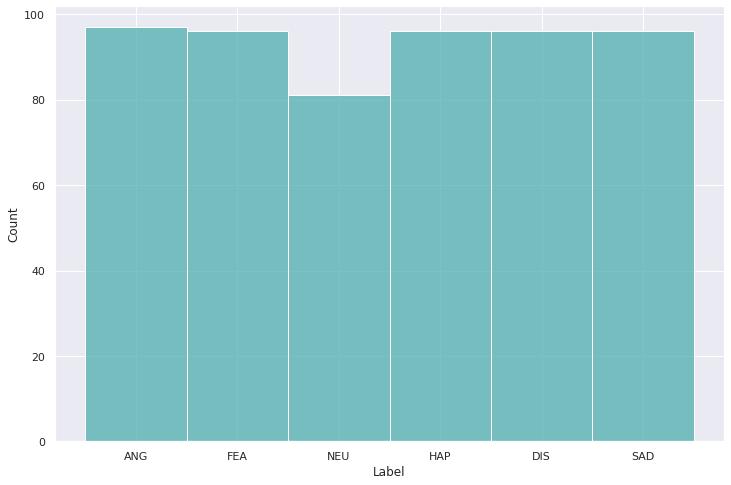

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#4FAEB0')

In [ ]:
audio_arrays = []

for i in audio_df['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)

audio_df['Arrays'] = audio_arrays

In [ ]:
audio_df

,Filepath,Label,Arrays
0,/content/drive/MyDrive/input/Crema/1002_IEO_AN...,ANG,"[-0.0029602128, -0.0034253618, -0.0034014236, ..."
1,/content/drive/MyDrive/input/Crema/1002_IEO_FE...,FEA,"[-0.006864673, -0.0077819405, -0.0075479914, -..."
2,/content/drive/MyDrive/input/Crema/1002_DFA_NE...,NEU,"[0.0055694007, 0.006952651, 0.007513523, 0.007..."
3,/content/drive/MyDrive/input/Crema/1002_DFA_HA...,HAP,"[0.0006576221, 0.00079320354, 0.0009516322, 0...."
4,/content/drive/MyDrive/input/Crema/1002_IEO_FE...,FEA,"[0.014089791, 0.015990878, 0.01521854, 0.01315..."
...,...,...,...
557,/content/drive/MyDrive/input/Crema/1006_WSI_AN...,ANG,"[-0.0015027429, -0.0015249216, -0.0011535966, ..."
558,/content/drive/MyDrive/input/Crema/1006_TSI_SA...,SAD,"[0.009559896, 0.011126596, 0.011059088, 0.0101..."
559,/content/drive/MyDrive/input/Crema/1006_WSI_DI...,DIS,"[0.00046690908, 0.00047851313, 0.0005587538, 0..."
560,/content/drive/MyDrive/input/Crema/1006_TIE_SA...,SAD,"[-0.009543636, -0.011240266, -0.011296441, -0...."


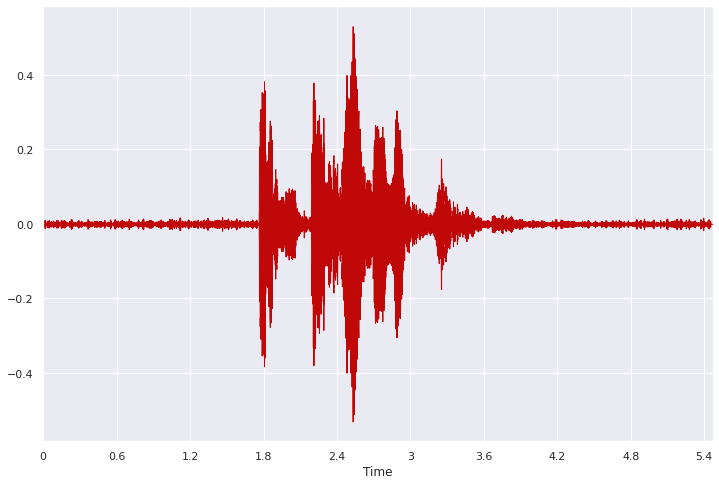

In [ ]:
#anger
angfile = audio_df[audio_df['Label'] == 'ANG']['Filepath']
angarray = audio_df[audio_df['Label'] == 'ANG']['Arrays']

librosa.display.waveplot(angarray.iloc[0], color='#C00808')
IPython.display.Audio(angfile.iloc[0])

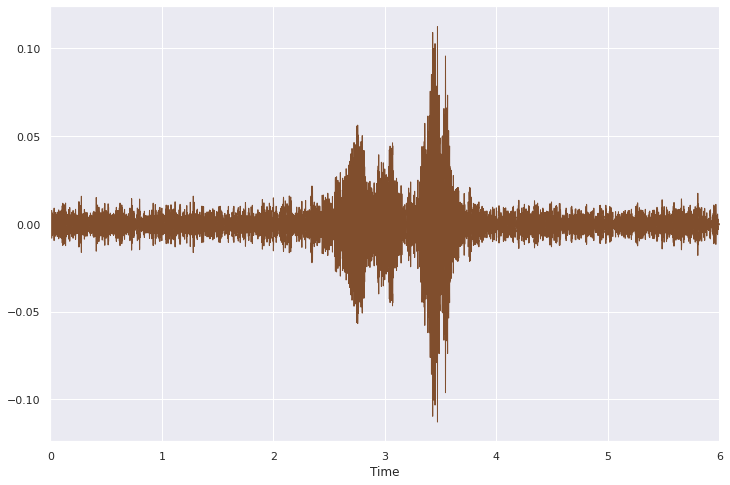

In [ ]:
#disgust
disfile = audio_df[audio_df['Label'] == 'DIS']['Filepath']
disarray = audio_df[audio_df['Label'] == 'DIS']['Arrays']

librosa.display.waveplot(disarray.iloc[0], color='#804E2D')
IPython.display.Audio(disfile.iloc[0])

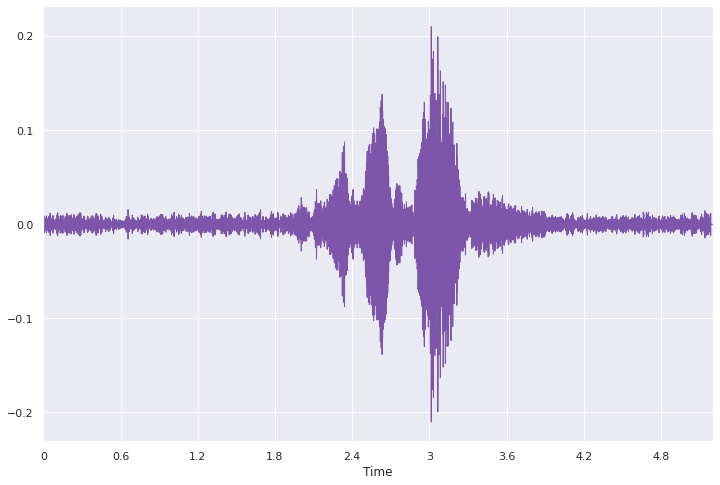

In [ ]:
#fear
feafile = audio_df[audio_df['Label'] == 'FEA']['Filepath']
feaarray = audio_df[audio_df['Label'] == 'FEA']['Arrays']

librosa.display.waveplot(feaarray.iloc[0], color='#7D55AA')
IPython.display.Audio(feafile.iloc[0])

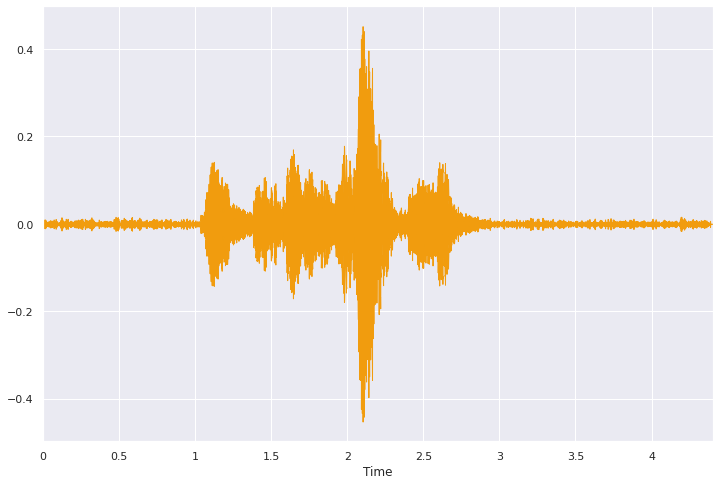

In [ ]:
#happiness
hapfile = audio_df[audio_df['Label'] == 'HAP']['Filepath']
haparray = audio_df[audio_df['Label'] == 'HAP']['Arrays']

librosa.display.waveplot(haparray.iloc[0], color='#F19C0E')
IPython.display.Audio(hapfile.iloc[0])

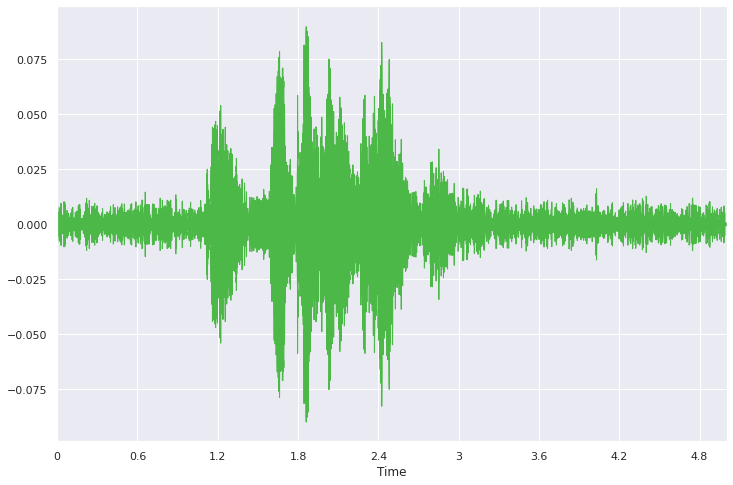

In [ ]:
#neutral
neufile = audio_df[audio_df['Label'] == 'NEU']['Filepath']
neuarray = audio_df[audio_df['Label'] == 'NEU']['Arrays']

librosa.display.waveplot(neuarray.iloc[0], color='#4CB847')
IPython.display.Audio(neufile.iloc[0])

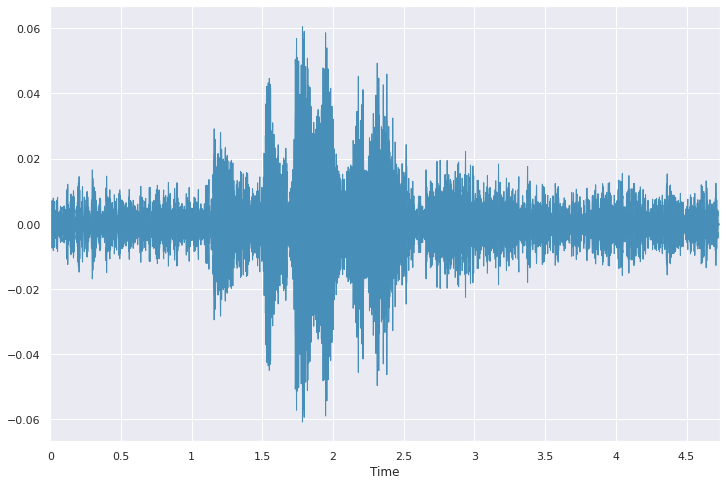

In [ ]:
#sadness
sadfile = audio_df[audio_df['Label'] == 'SAD']['Filepath']
sadarray = audio_df[audio_df['Label'] == 'SAD']['Arrays']

librosa.display.waveplot(sadarray.iloc[0], color='#478FB8')
IPython.display.Audio(sadfile.iloc[0])

In [ ]:
#data augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
#extracting features
def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))

    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));

    return result

In [ ]:
def get_features(data):
    result = []

    # without augmentation
    res1 = extract_features(data)
    result.append(res1)

    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result.append(res2)

    # with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr)
    res3 = extract_features(data_stretch_pitch)
    result.append(res3)

    return result

In [ ]:
warnings.filterwarnings('ignore')

x = []
y = []
for i in range(len(audio_df)):
    feature=get_features(audio_df['Arrays'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(audio_df['Label'].iloc[i])

In [ ]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#train, test, split
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.1)

In [ ]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((1517, 167), (1517, 6), (169, 167), (169, 6))


In [ ]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [ ]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((1517, 167, 1), (1517, 6), (169, 167, 1), (169, 6))


In [ ]:
#creating model
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 165, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 163, 256)          98560     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 163, 256)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 161, 512)          393728    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 161, 512)         0

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/50
12/12 [==============================] - 132s 11s/step - loss: 5.4850 - accuracy: 0.1655 - val_loss: 1.7951 - val_accuracy: 0.1834
Epoch 2/50
12/12 [==============================] - 126s 10s/step - loss: 1.7941 - accuracy: 0.1595 - val_loss: 1.7917 - val_accuracy: 0.1183
Epoch 3/50
12/12 [==============================] - 126s 10s/step - loss: 1.7845 - accuracy: 0.2030 - val_loss: 1.7721 - val_accuracy: 0.1893
Epoch 4/50
12/12 [==============================] - 124s 10s/step - loss: 1.7840 - accuracy: 0.2063 - val_loss: 1.7568 - val_accuracy: 0.2012
Epoch 5/50
12/12 [==============================] - 127s 11s/step - loss: 1.7555 - accuracy: 0.2268 - val_loss: 1.6641 - val_accuracy: 0.2959
Epoch 6/50
12/12 [==============================] - 127s 11s/step - loss: 1.7202 - accuracy: 0.2498 - val_loss: 1.7480 - val_accuracy: 0.2367
Epoch 7/50
12/12 [==============================] - 125s 10s/step - loss: 1.6700 - accuracy: 0.2953 - val_loss: 1.6020 - val_accuracy: 0.2722
Epoch 

6/6 [==============================] - 3s 406ms/step


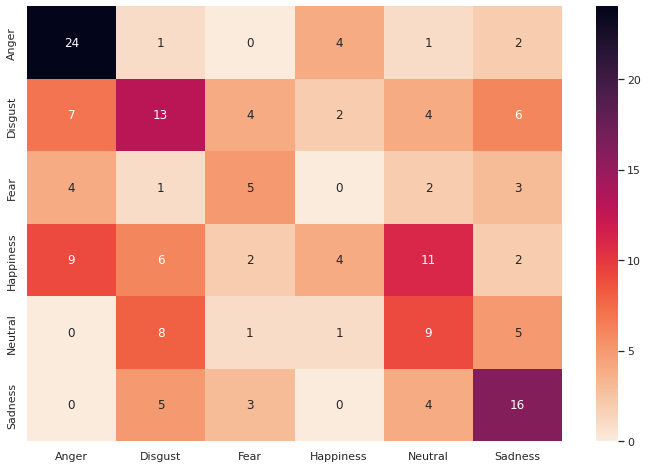

In [ ]:
#evaluating model
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [ ]:
path_to_model = "./model.h5"

model.save(path_to_model)